<a href="https://colab.research.google.com/github/indrad123/imagecaptioning/blob/main/msc_cnn_rnn_imagecaptioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Pre-requisites

In [ ]:
!pip install --upgrade lxml
!pip install openimages
!pip install -U torchtext==0.6
!pip install pycocotools
!pip install torch_summary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.4
    Uninstalling lxml-4.9.4:
      Successfully uninstalled lxml-4.9.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvid

# Read Captions from Translated Datasets


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COCO Datasets/data_translate.csv')

In [ ]:
#!pip install torch_snippets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 79.5 MB/s eta 0:

In [ ]:
from torch_snippets import *
import json
device = 'cuda' if torch.cuda.is_available() else 'cpu'

ModuleNotFoundError: No module named 'torch_snippets'

In [ ]:
from openimages.download import _download_images_by_id

# Create directory
# !mkdir -p train-images val-images

# Download images for images labelled as train
subset_imageIds = data[data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', '/content/drive/MyDrive/Colab Notebooks/COCO Datasets/train-images/')

# Download images for images labelled not as train, for validation purpose
subset_imageIds = data[~data['train']].image_id.tolist()
_download_images_by_id(subset_imageIds, 'train', '/content/drive/MyDrive/Colab Notebooks/COCO Datasets/val-images/')

100%|██████████| 4956/4956 [02:02<00:00, 40.36it/s]


In [ ]:
# Import the Field class from the torchtext.data module for handling text data
from torchtext.data import Field

# Import the COCO class from the pycocotools.coco module to interact with the COCO dataset
from pycocotools.coco import COCO

# Import defaultdict from the collections module to create dictionaries with default values
from collections import defaultdict

# Define a Field object for processing caption text.
# - sequential=False: Indicates that the data will not be treated as a sequence (though this is unusual for text data).
# - init_token='<start>': A token to signify the start of a sequence.
# - eos_token='<end>': A token to signify the end of a sequence.
captions = Field(sequential=False, init_token='<start>', eos_token='<end>')

# Filter the dataset to only include the training set and extract the captions column as a list
all_captions = data[data['train']]['caption'].tolist()

# Tokenize all captions by converting each caption to lowercase and splitting it into words
all_tokens = [[w.lower() for w in c.split()] for c in all_captions]

# Flatten the list of lists (tokens of each caption) into a single list of tokens
all_tokens = [w for sublist in all_tokens for w in sublist]

# Build the vocabulary for the captions Field object using the list of all tokens
captions.build_vocab(all_tokens)


In [ ]:
# Define an empty class named Vocab, which will be used to store vocabulary mappings
class Vocab:
    pass

# Create an instance of the Vocab class
vocab = Vocab()

# Insert the '<pad>' token at the beginning of the list of tokens in the 'itos' (index to string) mapping
# This ensures that the padding token has an index of 0
captions.vocab.itos.insert(0, '<pad>')

# Assign the modified 'itos' list from the captions' vocabulary to the 'vocab' instance
vocab.itos = captions.vocab.itos

# Create the 'stoi' (string to index) mapping for the 'vocab' instance using defaultdict
# If a token is not found in the vocabulary, it will default to the index of '<unk>' (unknown token)
vocab.stoi = defaultdict(lambda: captions.vocab.itos.index('<unk>'))

# Explicitly set the index of the '<pad>' token to 0 in the 'stoi' mapping
vocab.stoi['<pad>'] = 0

# Iterate over the original 'stoi' mapping from the captions' vocabulary
# Increment each index by 1 and assign it to the 'stoi' mapping of the 'vocab' instance
# This shift ensures that the '<pad>' token is at index 0 and all other indices are adjusted accordingly
for s, i in captions.vocab.stoi.items():
    vocab.stoi[s] = i + 1


In [ ]:
# Import necessary functions from the torchvision library for image transformations
from torchvision import transforms

# Define a custom dataset class for image captioning that inherits from torch.utils.data.Dataset
class CaptioningData(Dataset):
    def __init__(self, root, df, vocab):
        # Initialize the dataset with the root directory of images, dataframe, and vocabulary
        self.df = df.reset_index(drop=True)  # Reset the index of the dataframe
        self.root = root  # Root directory where images are stored
        self.vocab = vocab  # Vocabulary object with 'itos' and 'stoi' mappings

        # Define a series of transformations to be applied to each image
        self.transform = transforms.Compose([
            transforms.Resize(224),  # Resize the image to 224x224 pixels
            transforms.RandomCrop(224),  # Randomly crop the image to 224x224 pixels
            transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
            transforms.ToTensor(),  # Convert the image to a PyTorch tensor
            transforms.Normalize((0.485, 0.456, 0.406),  # Normalize the image with mean and std values
                                 (0.229, 0.224, 0.225))]
        )

    def __getitem__(self, index):
        """Returns one data pair (image and caption)."""
        # Get the row from the dataframe corresponding to the given index
        row = self.df.iloc[index].squeeze()
        id = row.image_id  # Extract the image_id from the row

        image_path = f'{self.root}/{id}.jpg'  # Construct the full path to the image
        image = Image.open(os.path.join(image_path)).convert('RGB')  # Open the image and convert it to RGB

        caption = row.caption  # Get the caption for the image
        tokens = str(caption).lower().split()  # Tokenize the caption (convert to lowercase and split by spaces)

        # Create a list of token indices, starting with <start> and ending with <end>
        target = []
        target.append(vocab.stoi['<start>'])
        target.extend([vocab.stoi[token] for token in tokens])
        target.append(vocab.stoi['<end>'])
        target = torch.Tensor(target).long()  # Convert the target list to a PyTorch tensor of type long

        return image, target, caption  # Return the image, target tensor, and original caption

    def choose(self):
        """Randomly choose an item from the dataset."""
        return self[np.random.randint(len(self))]

    def __len__(self):
        """Return the length of the dataset."""
        return len(self.df)

    def collate_fn(self, data):
        """Custom collate function to be used with a DataLoader."""
        # Sort the data by the length of the target captions in descending order
        data.sort(key=lambda x: len(x[1]), reverse=True)

        # Unzip the data into separate lists
        images, targets, captions = zip(*data)

        # Apply the defined transformations to each image and stack them into a single tensor
        images = torch.stack([self.transform(image) for image in images], 0)

        # Get the lengths of each target caption
        lengths = [len(tar) for tar in targets]

        # Create a tensor to hold the padded targets
        _targets = torch.zeros(len(captions), max(lengths)).long()
        for i, tar in enumerate(targets):
            end = lengths[i]
            _targets[i, :end] = tar[:end]  # Copy each target into the _targets tensor

        # Return the processed images, targets, and lengths as tensors moved to the appropriate device
        return images.to(device), _targets.to(device), torch.tensor(lengths).long().to(device)

# Create training and validation datasets using the CaptioningData class
trn_ds = CaptioningData('/content/drive/MyDrive/Colab Notebooks/COCO Datasets/train-images', data[data['train']], vocab)
val_ds = CaptioningData('/content/drive/MyDrive/Colab Notebooks/COCO Datasets/val-images', data[~data['train']], vocab)

# Randomly choose an item from the training dataset
image, target, caption = trn_ds.choose()

# Display the chosen image with its caption, resizing the display to a size of 5
show(image, title=caption, sz=5); print(target)  # Show the image with the caption and print the target tensor


NameError: name 'Dataset' is not defined

In [ ]:
# Create a DataLoader for the training dataset
# - trn_ds: The training dataset created from the CaptioningData class
# - 32: The batch size, meaning each batch will contain 32 samples
# - collate_fn=trn_ds.collate_fn: Specifies the custom collate function to be used for batching the data
trn_dl = DataLoader(trn_ds, 32, collate_fn=trn_ds.collate_fn)

# Create a DataLoader for the validation dataset
# - val_ds: The validation dataset created from the CaptioningData class
# - 32: The batch size, meaning each batch will contain 32 samples
# - collate_fn=val_ds.collate_fn: Specifies the custom collate function to be used for batching the data
val_dl = DataLoader(val_ds, 32, collate_fn=val_ds.collate_fn)

# Retrieve the first batch from the training DataLoader
# - next(iter(trn_dl)): Gets the next item from the iterator created by the DataLoader, which is a batch of data
# - *next(iter(trn_dl)): Unpacks the batch into individual components (images, targets, lengths)
# - inspect(..., names='images,targets,lengths'): Calls the inspect function to display or process the batch, providing names for each component
inspect(*next(iter(trn_dl)), names='images,targets,lengths')


══════════════════════════════════════════════════════════════════
tensor([[[[-0.6281, -0.6281, -0.6452,  ...,  0.2453,  1.0502,  1.0673],
          [-0.6281, -0.6281, -0.6452,  ...,  0.3481,  1.0844,  1.0673],
          [-0.6281, -0.6109, -0.6281,  ...,  0.4337,  1.0844,  0.9988],
          ...,
          [-1.9638, -1.9467, -1.9295,  ...,  0.1597,  0.1768,  0.2111],
          [-1.9638, -1.9638, -1.9467,  ...,  0.1597,  0.1597,  0.1597],
          [-1.9980, -1.9809, -1.9638,  ...,  0.2111,  0.1426,  0.1254]],

         [[ 0.5203,  0.5203,  0.5203,  ...,  0.9230,  1.2906,  1.2381],
          [ 0.5203,  0.5378,  0.5378,  ...,  0.9580,  1.3081,  1.2381],
          [ 0.5378,  0.5378,  0.5203,  ...,  1.0105,  1.3081,  1.1681],
          ...,
          [-1.7381, -1.7031, -1.7031,  ...,  0.3627,  0.3978,  0.4328],
          [-1.7206, -1.7031, -1.6856,  ...,  0.3803,  0.3803,  0.3803],
          [-1.7206, -1.7031, -1.6856,  ...,  0.4153,  0.3452,  0.3452]],

         [[ 2.0300,  2.0125,  2.012

In [ ]:
# Import the pack_padded_sequence function for handling variable length sequences
from torch.nn.utils.rnn import pack_padded_sequence

# Import the models module from torchvision to load pretrained models
from torchvision import models

# Define a custom Encoder class using a Convolutional Neural Network (CNN)
class EncoderCNN(nn.Module):
    def __init__(self, embed_size):
        """Load the pretrained ResNet-152 and replace top fc layer."""
        super(EncoderCNN, self).__init__()

        # Load a pretrained ResNet-152 model
        resnet = models.resnet152(pretrained=True)

        # Remove the last fully connected (fc) layer of ResNet-152
        modules = list(resnet.children())[:-1] # delete the last fc layer.

        # Create a new sequential model with the modified ResNet-152
        self.resnet = nn.Sequential(*modules)

        # Define a new fully connected layer to map the ResNet output to the desired embedding size
        self.linear = nn.Linear(resnet.fc.in_features, embed_size)

        # Add a batch normalization layer to the output of the fully connected layer
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

    def forward(self, images):
        """Extract feature vectors from input images."""
        # Disable gradient calculation for the ResNet layers (since they are pretrained)
        with torch.no_grad():
            # Pass the input images through the ResNet model
            features = self.resnet(images)

        # Reshape the output features to (batch_size, -1)
        features = features.reshape(features.size(0), -1)

        # Pass the features through the fully connected layer and batch normalization layer
        features = self.bn(self.linear(features))

        # Return the extracted feature vectors
        return features

# Create an instance of the EncoderCNN class with an embedding size of 256
encoder = EncoderCNN(256).to(device)

# Import the summary function from torchsummary to display model architecture
from torchsummary import summary

# Print a summary of the encoder model, specifying the input tensor shape
print(summary(encoder, torch.zeros(32, 3, 224, 224).to(device)))


NameError: name 'nn' is not defined

In [ ]:
# Define a custom Decoder class using a Recurrent Neural Network (RNN) with LSTM
class DecoderRNN(nn.Module):
    def __init__(self, embed_size, hidden_size, vocab_size, num_layers, max_seq_length=80):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()

        # Embedding layer to convert word indices to embeddings
        self.embed = nn.Embedding(vocab_size, embed_size)

        # LSTM layer with specified hidden size, number of layers, and batch_first=True
        # batch_first=True means that the input and output tensors are provided as (batch_size, sequence_length, features)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)

        # Fully connected layer to map the hidden state output from LSTM to the vocabulary size
        self.linear = nn.Linear(hidden_size, vocab_size)

        # Maximum sequence length for generated captions
        self.max_seq_length = max_seq_length

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generate captions."""
        # Embed the input captions (convert word indices to embeddings)
        embeddings = self.embed(captions)

        # Concatenate the image features and the embedded captions along the sequence dimension
        embeddings = torch.cat((features.unsqueeze(1), embeddings), 1)

        # Pack the padded sequence to handle variable length sequences efficiently
        packed = pack_padded_sequence(embeddings, lengths.cpu(), batch_first=True)

        # Pass the packed sequence through the LSTM
        outputs, _ = self.lstm(packed)

        # Pass the LSTM outputs through the fully connected layer to get vocabulary scores
        outputs = self.linear(outputs[0])

        # Return the final outputs
        return outputs

    def predict(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []  # List to store the generated word indices
        inputs = features.unsqueeze(1)  # Add sequence dimension to features

        # Generate captions word by word up to max_seq_length
        for i in range(self.max_seq_length):
            # Pass the current inputs and states through the LSTM
            hiddens, states = self.lstm(inputs, states)  # hiddens: (batch_size, 1, hidden_size)

            # Pass the LSTM output through the fully connected layer to get vocabulary scores
            outputs = self.linear(hiddens.squeeze(1))  # outputs: (batch_size, vocab_size)

            # Get the index of the most probable next word
            _, predicted = outputs.max(1)  # predicted: (batch_size)

            # Append the predicted word index to the list of sampled_ids
            sampled_ids.append(predicted)

            # Embed the predicted word and use it as the input for the next time step
            inputs = self.embed(predicted)  # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)  # inputs: (batch_size, 1, embed_size)

        # Stack the list of sampled_ids to create a tensor of shape (batch_size, max_seq_length)
        sampled_ids = torch.stack(sampled_ids, 1)

        # Convert the predicted word indices to strings (captions)
        sentences = []
        for sampled_id in sampled_ids:
            sampled_id = sampled_id.cpu().numpy()  # Convert to numpy array
            sampled_caption = []
            for word_id in sampled_id:
                word = vocab.itos[word_id]  # Get the word from the vocabulary
                sampled_caption.append(word)
                if word == '<end>':
                    break
            sentence = ' '.join(sampled_caption)  # Join the words to form the sentence
            sentences.append(sentence)

        # Return the generated sentences
        return sentences


In [ ]:
# Define a function to train a single batch of data
def train_batch(data, encoder, decoder, optimizer, criterion):
    # Set the encoder and decoder to training mode
    encoder.train()
    decoder.train()

    # Unpack the batch data
    images, captions, lengths = data

    # Move the images and captions to the specified device (e.g., GPU)
    images = images.to(device)
    captions = captions.to(device)

    # Prepare the targets by packing the padded sequences
    # This removes the padding and keeps only the valid sequence elements
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    # Pass the images through the encoder to extract features
    features = encoder(images)

    # Pass the extracted features, captions, and lengths through the decoder to get the outputs
    outputs = decoder(features, captions, lengths)

    # Calculate the loss using the criterion (e.g., cross-entropy loss)
    loss = criterion(outputs, targets)

    # Zero the gradients for both the encoder and decoder
    decoder.zero_grad()
    encoder.zero_grad()

    # Backpropagate the loss to compute the gradients
    loss.backward()

    # Update the model parameters using the optimizer
    optimizer.step()

    # Return the loss value for logging or monitoring purposes
    return loss


In [ ]:
# Decorator to disable gradient calculation, which reduces memory consumption and speeds up computation
@torch.no_grad()
def validate_batch(data, encoder, decoder, criterion):
    # Set the encoder and decoder to evaluation mode
    encoder.eval()
    decoder.eval()

    # Unpack the batch data
    images, captions, lengths = data

    # Move the images and captions to the specified device (e.g., GPU)
    images = images.to(device)
    captions = captions.to(device)

    # Prepare the targets by packing the padded sequences
    # This removes the padding and keeps only the valid sequence elements
    targets = pack_padded_sequence(captions, lengths.cpu(), batch_first=True)[0]

    # Pass the images through the encoder to extract features
    features = encoder(images)

    # Pass the extracted features, captions, and lengths through the decoder to get the outputs
    outputs = decoder(features, captions, lengths)

    # Calculate the loss using the criterion (e.g., cross-entropy loss)
    loss = criterion(outputs, targets)

    # Return the loss value for logging or monitoring purposes
    return loss


In [ ]:
# Initialize the encoder and decoder models
encoder = EncoderCNN(256).to(device)
decoder = DecoderRNN(256, 512, len(vocab.itos), 1).to(device)

# Define the loss criterion as CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Collect parameters from the decoder and the trainable parts of the encoder
params = list(decoder.parameters()) + list(encoder.linear.parameters()) + list(encoder.bn.parameters())

# Initialize the optimizer with AdamW, using the collected parameters and a learning rate of 1e-3
optimizer = torch.optim.AdamW(params, lr=1e-3)

# Set the number of epochs for training
n_epochs = 10

# Initialize a logging utility (assuming Report is a custom class or function for logging training progress)
log = Report(n_epochs)


EPOCH: 1.000  trn_loss: 2.608  val_loss: 2.254  (2697.11s - 24274.00s remaining)
EPOCH: 2.000  trn_loss: 2.103  val_loss: 2.111  (5419.88s - 21679.53s remaining)
EPOCH: 3.000  trn_loss: 1.936  val_loss: 2.063  (8155.01s - 19028.35s remaining)
EPOCH: 4.000  trn_loss: 1.824  val_loss: 2.050  (10921.65s - 16382.48s remaining)
EPOCH: 5.000  trn_loss: 1.740  val_loss: 2.053  (13643.56s - 13643.56s remaining)
EPOCH: 6.000  trn_loss: 1.619  val_loss: 2.017  (16331.90s - 10887.93s remaining)
EPOCH: 7.000  trn_loss: 1.585  val_loss: 2.014  (19018.44s - 8150.76s remaining)
EPOCH: 8.000  trn_loss: 1.567  val_loss: 2.014  (21705.12s - 5426.28s remaining)
EPOCH: 9.000  trn_loss: 1.553  val_loss: 2.015  (24396.07s - 2710.67s remaining)
EPOCH: 10.000  trn_loss: 1.540  val_loss: 2.015  (27097.61s - 0.00s remaining)


100%|██████████| 111/111 [00:00<00:00, 142.69it/s]


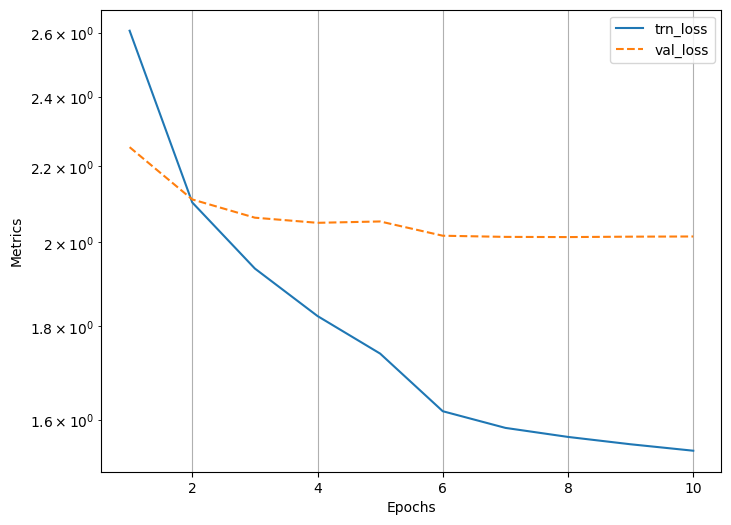

In [ ]:
# Iterate over each epoch
for epoch in range(n_epochs):
    # Adjust the learning rate after 5 epochs
    if epoch == 5:
        optimizer = torch.optim.AdamW(params, lr=1e-4)

    # Training Phase
    # Get the number of batches in the training dataloader
    N = len(trn_dl)
    # Iterate over each batch in the training dataloader
    for i, data in enumerate(trn_dl):
        # Train the model on the current batch and compute the training loss
        trn_loss = train_batch(data, encoder, decoder, optimizer, criterion)
        # Calculate the progress of the current epoch (epoch + fraction of current batch processed)
        pos = epoch + (1 + i) / N
        # Record the training loss and progress
        log.record(pos=pos, trn_loss=trn_loss, end='\r')

    # Validation Phase
    # Get the number of batches in the validation dataloader
    N = len(val_dl)
    # Iterate over each batch in the validation dataloader
    for i, data in enumerate(val_dl):
        # Validate the model on the current batch and compute the validation loss
        val_loss = validate_batch(data, encoder, decoder, criterion)
        # Calculate the progress of the current epoch (epoch + fraction of current batch processed)
        pos = epoch + (1 + i) / N
        # Record the validation loss and progress
        log.record(pos=pos, val_loss=val_loss, end='\r')

    # Report average training and validation losses for the current epoch
    log.report_avgs(epoch + 1)

# Plot the training and validation loss curves for each epoch
log.plot_epochs(log=True)


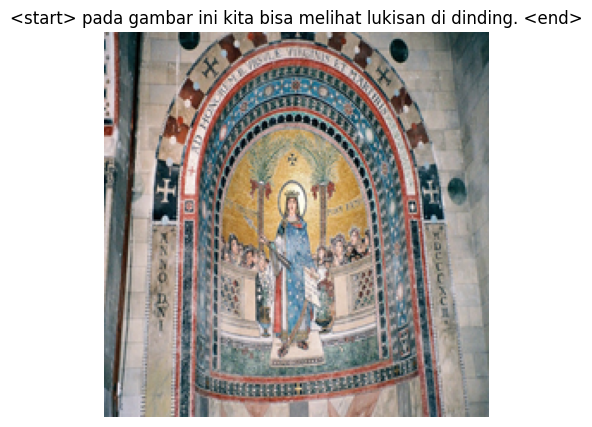

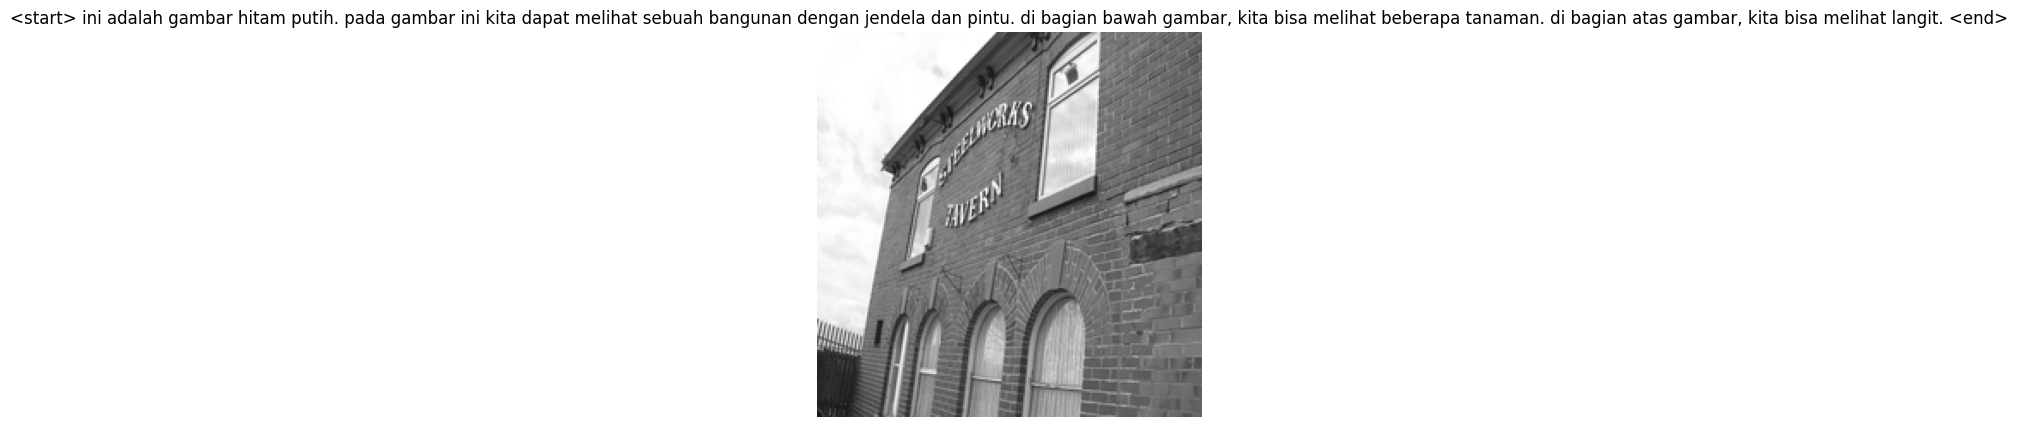

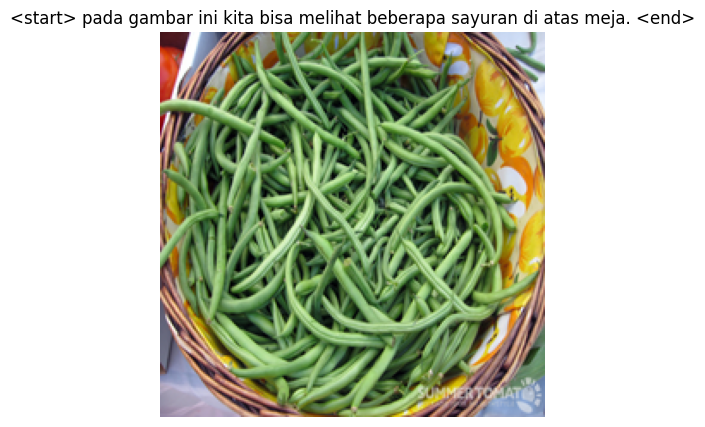

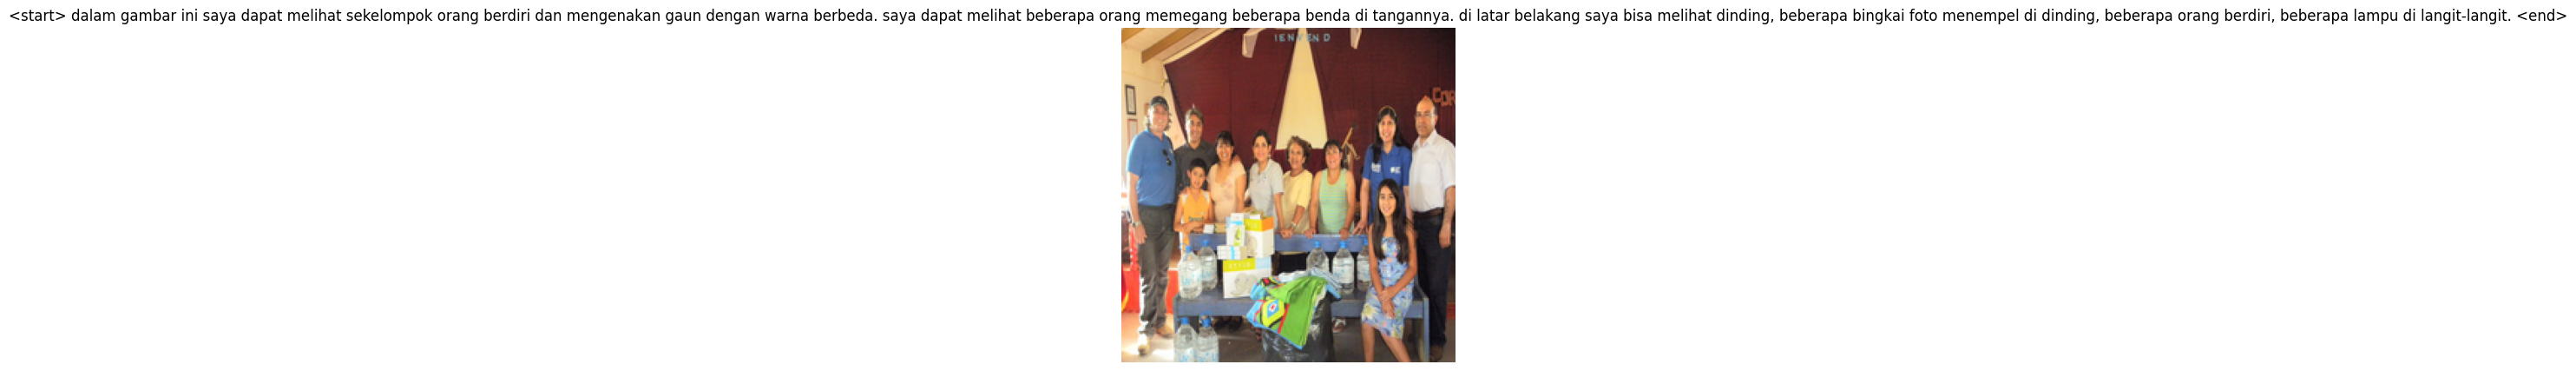

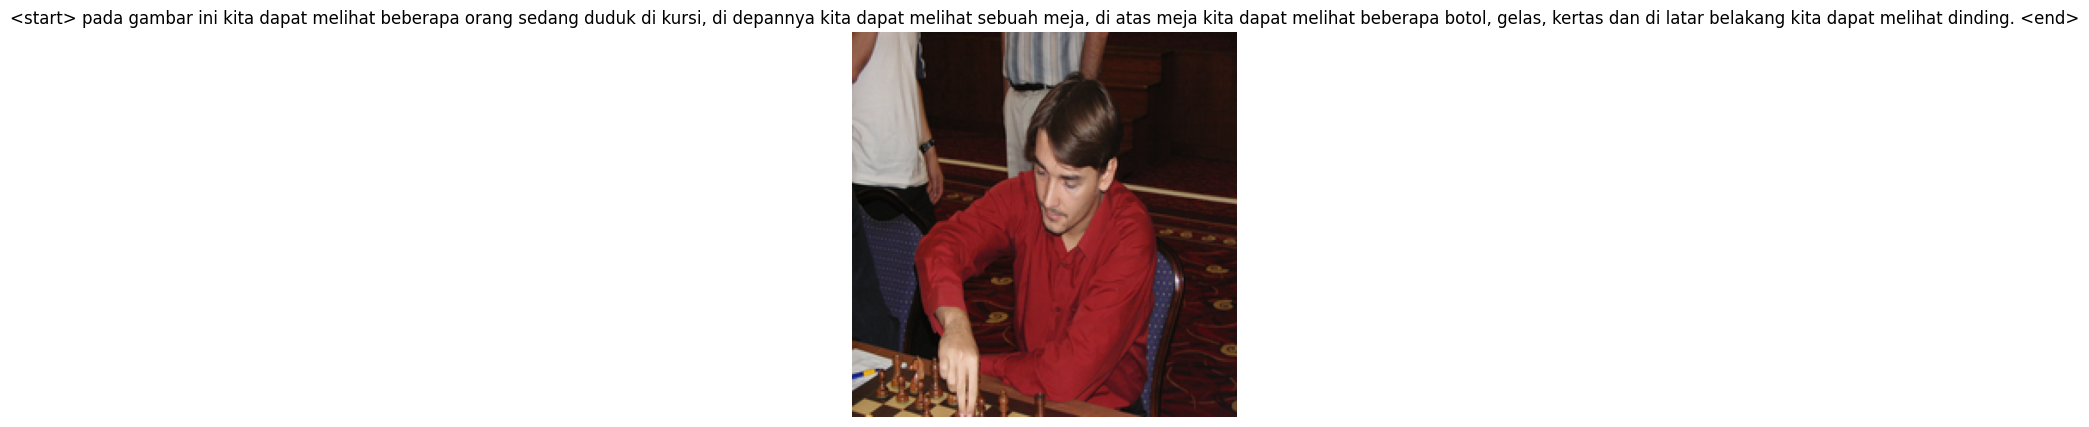

In [ ]:
# Function to load an image from the given path and apply transformations if specified
def load_image(image_path, transform=None):
    # Open the image and convert it to RGB mode
    image = Image.open(image_path).convert('RGB')
    # Resize the image to the specified dimensions using Lanczos resampling
    image = image.resize([224, 224], Image.LANCZOS)
    # Apply transformations if provided
    if transform is not None:
        # Apply the transformations and add a batch dimension
        tfm_image = transform(image)[None]
    # Return the original image and the transformed image tensor
    return image, tfm_image

# Decorator to disable gradient calculation during image loading and prediction
@torch.no_grad()
def load_image_and_predict(image_path):
    # Define the image transformation pipeline
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert the image to a PyTorch tensor
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # Normalize the image
    ])

    # Load the original image and apply transformations
    org_image, tfm_image = load_image(image_path, transform)

    # Move the transformed image tensor to the specified device (e.g., GPU)
    image_tensor = tfm_image.to(device)

    # Set the encoder and decoder models to evaluation mode
    encoder.eval()
    decoder.eval()

    # Extract features from the image using the encoder
    feature = encoder(image_tensor)

    # Generate a caption for the image using the decoder
    sentence = decoder.predict(feature)[0]

    # Display the original image with the predicted caption as the title
    show(org_image, title=sentence)

    # Return the predicted caption
    return sentence

# Get a list of image file paths from the 'val-images' directory
files = Glob('/content/drive/MyDrive/Colab Notebooks/COCO Datasets/val-images')

# Load images and generate captions for a random sample of 5 images
for _ in range(5):
    load_image_and_predict(choose(files))


In [ ]:
import torch
# Function to save the model parameters, optimizer state, and current epoch to a file
def save_model(encoder, decoder, optimizer, epoch, file_path):
    # Save model-related information and optimizer state to a dictionary
    torch.save({
        'epoch': epoch,  # Current epoch number
        'encoder_state_dict': encoder.state_dict(),  # State dictionary of the encoder model
        'decoder_state_dict': decoder.state_dict(),  # State dictionary of the decoder model
        'optimizer_state_dict': optimizer.state_dict(),  # State dictionary of the optimizer
    }, file_path)  # Save the dictionary to the specified file path

# Function to load the model parameters, optimizer state, and epoch from a saved file
def load_model(encoder, decoder, optimizer, file_path):
    # Load the saved model checkpoint
    checkpoint = torch.load(file_path)
    # Load the encoder's state dictionary from the checkpoint
    encoder.load_state_dict(checkpoint['encoder_state_dict'])
    # Load the decoder's state dictionary from the checkpoint
    decoder.load_state_dict(checkpoint['decoder_state_dict'])
    # Load the optimizer's state dictionary from the checkpoint
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    # Return the epoch number stored in the checkpoint
    return checkpoint['epoch']


In [ ]:
# Save the current state of the encoder, decoder, optimizer, and epoch to a checkpoint file
save_model(encoder, decoder, optimizer, epoch, '/content/drive/MyDrive/Colab Notebooks/CNN-RNN/checkpoint')


In [ ]:
# Create new instances of the encoder, decoder, and optimizer for evaluation
encoder_eval = EncoderCNN(256).to(device)
decoder_eval = DecoderRNN(256, 512, len(vocab.itos), 1).to(device)
optimizer_eval = torch.optim.AdamW(params, lr=1e-3)

# Load the model parameters and optimizer state from the checkpoint file
load_model(encoder_eval, decoder_eval, optimizer_eval, '/content/drive/MyDrive/Colab Notebooks/CNN-RNN/checkpoint')


9

In [ ]:
# Set the evaluation mode for the encoder
encoder_eval.eval()


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [ ]:
@torch.no_grad()
def load_image_and_predict_from_file(encoder_eval, decoder_eval, image_path):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406),
                             (0.229, 0.224, 0.225))
    ])

    org_image, tfm_image = load_image(image_path, transform)
    image_tensor = tfm_image.to(device)
    encoder_eval.eval()
    decoder_eval.eval()
    feature = encoder_eval(image_tensor)
    sentence = decoder_eval.predict(feature)[0]
    # show(org_image, title=sentence)
    # Display the original image with the predicted sentence as title
    plt.imshow(org_image)
    plt.title(sentence)
    plt.show()
    return sentence

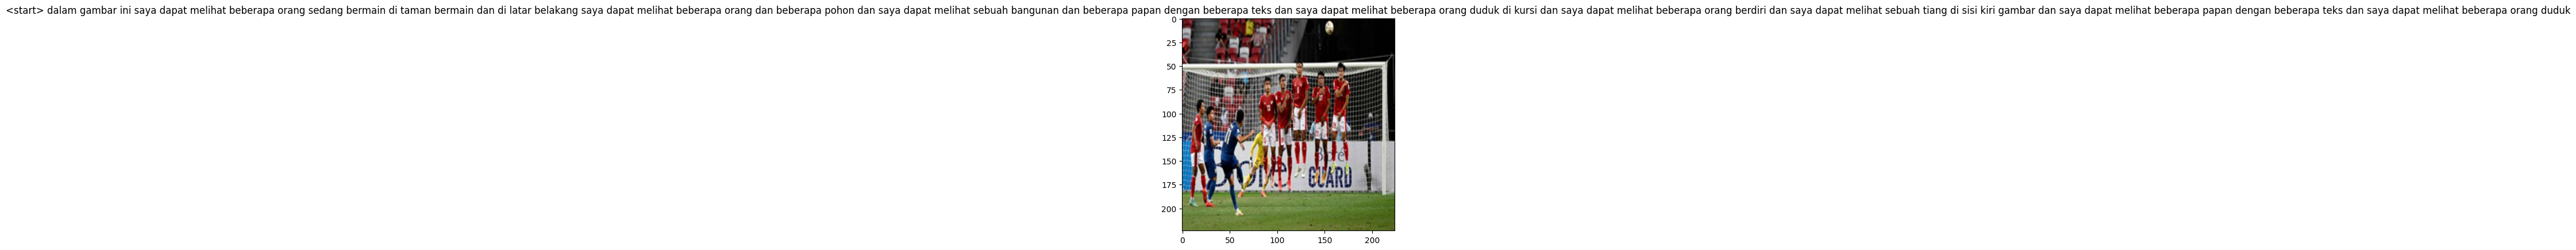

'<start> dalam gambar ini saya dapat melihat beberapa orang sedang bermain di taman bermain dan di latar belakang saya dapat melihat beberapa orang dan beberapa pohon dan saya dapat melihat sebuah bangunan dan beberapa papan dengan beberapa teks dan saya dapat melihat beberapa orang duduk di kursi dan saya dapat melihat beberapa orang berdiri dan saya dapat melihat sebuah tiang di sisi kiri gambar dan saya dapat melihat beberapa papan dengan beberapa teks dan saya dapat melihat beberapa orang duduk'

In [ ]:
load_image_and_predict_from_file(encoder_eval, decoder_eval, 'sepakbola.jpeg')

# Test Save Model

In [ ]:
encoder_eval = EncoderCNN(256).to(device)
decoder_eval = DecoderRNN(256, 512, len(vocab.itos), 1).to(device)
optimizer_eval = torch.optim.AdamW(params, lr=1e-3)
load_model(encoder_eval, decoder_eval, optimizer_eval, '/content/drive/MyDrive/Colab Notebooks/CNN-RNN/checkpoint')

9

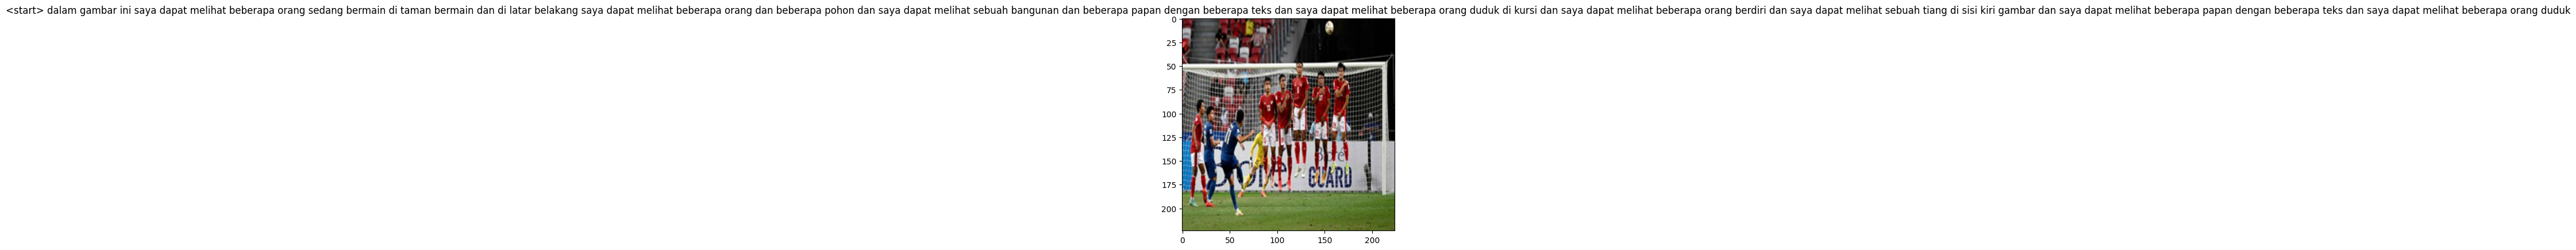

'<start> dalam gambar ini saya dapat melihat beberapa orang sedang bermain di taman bermain dan di latar belakang saya dapat melihat beberapa orang dan beberapa pohon dan saya dapat melihat sebuah bangunan dan beberapa papan dengan beberapa teks dan saya dapat melihat beberapa orang duduk di kursi dan saya dapat melihat beberapa orang berdiri dan saya dapat melihat sebuah tiang di sisi kiri gambar dan saya dapat melihat beberapa papan dengan beberapa teks dan saya dapat melihat beberapa orang duduk'

In [ ]:
load_image_and_predict_from_file(encoder_eval, decoder_eval, 'sepakbola.jpeg')

In [ ]:
import pickle
# Combine the models into a dictionary
models_dict = {
    'encoder': encoder_eval,
    'decoder': decoder_eval,
    'optimizer': optimizer_eval
}

# Save the models to a .pkl file
pkl_file_path = '/content/drive/MyDrive/Colab Notebooks/CNN-RNN/models.pkl'
with open(pkl_file_path, 'wb') as file:
    pickle.dump(models_dict, file)

# Load the models from the .pkl file
with open(pkl_file_path, 'rb') as file:
    loaded_dict = pickle.load(file)


NameError: name 'encoder_eval' is not defined

In [ ]:
# Extract the models
loaded_encoder = loaded_dict['encoder']
loaded_decoder = loaded_dict['decoder']
loaded_optimizer = loaded_dict['optimizer']

# Ensure the models are in evaluation mode if needed
loaded_encoder.eval()
loaded_decoder.eval()

DecoderRNN(
  (embed): Embedding(12615, 256)
  (lstm): LSTM(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=12615, bias=True)
)